In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df=pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.arrival_time.value_counts

<bound method IndexOpsMixin.value_counts of 0                 Night
1               Morning
2         Early_Morning
3             Afternoon
4               Morning
              ...      
300148          Evening
300149            Night
300150            Night
300151          Evening
300152          Evening
Name: arrival_time, Length: 300153, dtype: object>

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
df['duration'].min()

0.83

In [12]:
df['duration'].max()

49.83

In [13]:
df['duration'].median()

11.25

In [14]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)

df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [15]:
df.stops=pd.factorize(df.stops)[0]

In [16]:
df=df.join(pd.get_dummies(df.airline, prefix='Airline')).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city',axis=1)
df=df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time')).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df.departure_time, prefix='departure_time')).drop('departure_time',axis=1)

In [17]:
df

,stops,class,duration,days_left,price,Airline_AirAsia,Airline_Air_India,Airline_GO_FIRST,Airline_Indigo,Airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x,y=df.drop('price',axis=1),df.price

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [21]:
reg.score(x_test,y_test)

0.9851614129000458

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
y_pred=reg.predict(x_test)
print('B2:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

B2: 0.9851614129000458
MAE: 1096.3301500238501
MSE: 7651702.139023125
RMSE: 2766.171024904846


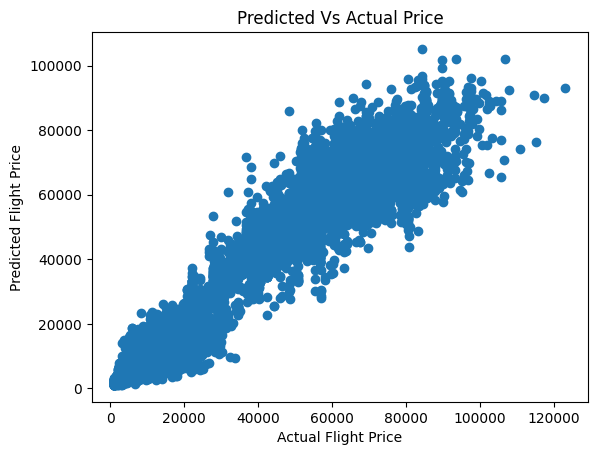

In [23]:
plt.scatter(y_test,y_pred)
plt.title('Predicted Vs Actual Price')
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.show()


In [24]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [25]:
importances=dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances=sorted(importances.items(),key=lambda x:x[1],reverse=True)

sorted_importances

[('class', 0.8798549356598703),
 ('duration', 0.057465692553727736),
 ('days_left', 0.01854477436883707),
 ('Airline_Air_India', 0.00558347854552523),
 ('Airline_Vistara', 0.00436886081729169),
 ('source_Delhi', 0.0036951369904603443),
 ('dest_Delhi', 0.0031299709605849195),
 ('source_Mumbai', 0.0021118713880552433),
 ('dest_Mumbai', 0.0019637938704343324),
 ('stops', 0.001878055834098241),
 ('dest_Kolkata', 0.001743925008480195),
 ('source_Kolkata', 0.001698678283589996),
 ('dest_Hyderabad', 0.0014669558873251659),
 ('arrival_time_Evening', 0.0014494382922861295),
 ('source_Hyderabad', 0.0013950283366390287),
 ('dest_Bangalore', 0.0012963125244534477),
 ('source_Bangalore', 0.0012264808893790538),
 ('arrival_time_Night', 0.0011907715738913),
 ('departure_time_Evening', 0.0011410323552521486),
 ('arrival_time_Afternoon', 0.001066844195896509),
 ('source_Chennai', 0.0009973944564218918),
 ('departure_time_Morning', 0.0009384922765778434),
 ('dest_Chennai', 0.0008808518854834019),
 ('dep

<BarContainer object of 5 artists>

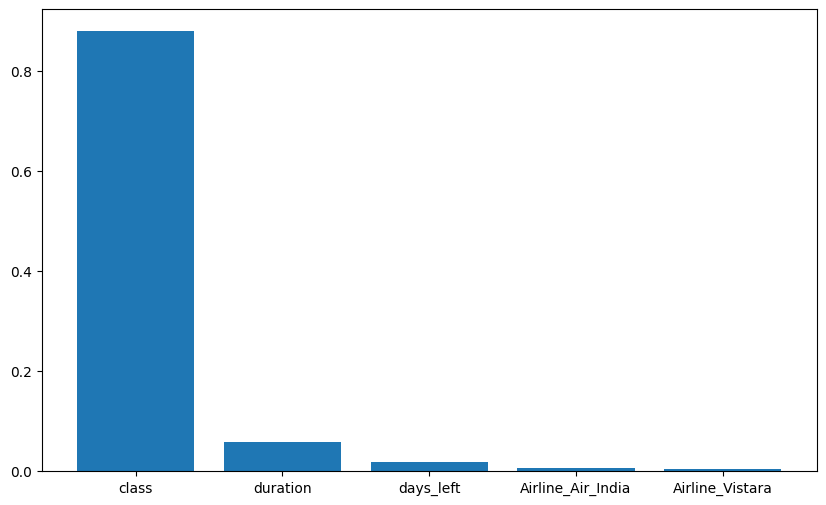

In [26]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:5]],[x[1] for x in sorted_importances[:5]])

In [ ]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min-samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
    
}

grid_search=GridSearchCV(reg,param_grid,cv=5)
grid_search.fit(x_train,y_train)

brst_params=grid_search.best_params_
